In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, analysis as ana, tools_qrec, local, tools_cmb, tools_cib, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
def angle(wind,cn,tcb=None):
    aobj = local.init_analysis(freq='smica',dtype='full',wind='L'+wind,fltr='cinv')
    qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)
    iobj = tools_cib.init_cib(wind=wind)
    xobj = tools_qrec.cross(qobj['ilens'],iobj)
    mb = bn.multipole_binning(10,lmin=8,lmax=400)
    if cn==3: tcb = tools_qrec.n0_template(aobj,iobj,mb)
    mcb, vcb, scb, ocb = tools_qrec.binned_spec(mb,aobj,qobj,xobj,cn,tcb=tcb)
    if cn==3: fcb = bn.binning(aobj.ckk*np.pi/180,mb)
    if cn==5: fcb = bn.binned_spec(mb,xobj.fcli['TB'],cn=7)[3]*np.pi/180
    st = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=fcb,diag=True,disp=True) for q in ['TB','EB','BB','MV']}
    st = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=fcb,diag=False,disp=True) for q in ['TB','EB','BB','MV']}
    return st

In [3]:
st = {}
for wind in ['G40','G60']:
    for cn in [3,5]:
        print(wind,cn)
        st[wind,cn] = angle(wind,cn)
    for q in ['TB','EB','BB','MV']:
        sigma = np.sqrt(1./(1./st[wind,3][q].sA**2+1./st[wind,5][q].sA**2))
        mean = (st[wind,3][q].oA/st[wind,3][q].sA**2+st[wind,5][q].oA/st[wind,5][q].sA**2)*sigma**2
        print(mean,sigma)

G40 3
obs A -0.816 mean(A) 0.101 sigma(A) 0.83 S/N 1.205 A>oA 0.28
obs A -0.064 mean(A) 0.016 sigma(A) 0.833 S/N 1.2 A>oA 0.96
obs A 1.275 mean(A) 0.0 sigma(A) 1.305 S/N 0.766 A>oA 0.28
obs A -0.239 mean(A) 0.047 sigma(A) 0.559 S/N 1.789 A>oA 0.6399999999999999
obs A -0.846 mean(A) 0.096 sigma(A) 0.875 S/N 1.142 A>oA 0.3400000000000001
obs A -0.046 mean(A) 0.016 sigma(A) 0.878 S/N 1.139 A>oA 0.94
obs A 1.237 mean(A) 0.035 sigma(A) 1.339 S/N 0.747 A>oA 0.4
obs A -0.39 mean(A) 0.041 sigma(A) 0.564 S/N 1.772 A>oA 0.52
G40 5
obs A -1.24 mean(A) 0.091 sigma(A) 0.663 S/N 1.508 A>oA 0.040000000000000036
obs A -0.404 mean(A) 0.132 sigma(A) 0.761 S/N 1.314 A>oA 0.43999999999999995
obs A 0.359 mean(A) -0.059 sigma(A) 0.882 S/N 1.134 A>oA 0.64
obs A -0.539 mean(A) 0.062 sigma(A) 0.437 S/N 2.287 A>oA 0.1399999999999999
obs A -1.699 mean(A) 0.111 sigma(A) 0.671 S/N 1.489 A>oA 0.0
obs A -0.072 mean(A) 0.124 sigma(A) 0.809 S/N 1.237 A>oA 0.78
obs A 0.755 mean(A) -0.042 sigma(A) 0.935 S/N 1.07 A>oA 0.

(array([ 2.,  1.,  6.,  6., 12., 15.,  8.,  8., 17., 10.,  7.,  6.,  0.,
         1.,  1.]),
 array([-1.77846423, -1.53350843, -1.28855263, -1.04359683, -0.79864103,
        -0.55368523, -0.30872942, -0.06377362,  0.18118218,  0.42613798,
         0.67109378,  0.91604958,  1.16100538,  1.40596118,  1.65091698,
         1.89587278]),
 <BarContainer object of 15 artists>)

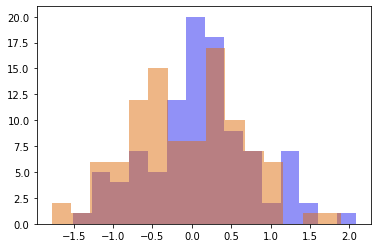

In [4]:
hist(st['G40',5]['TB'].A,bins=15,alpha=.5)
hist(st['G60',5]['TB'].A,bins=15,alpha=.5)
#hist(st[5]['EB'].A,bins=20)